# Spotted Python Week 5 Tutorial
In this script, we aim to practice the following skills:
- Scaling Relations
- Fitting a linear curve
- BPT diagrams

In [1]:
# import libraries
from math import log10, floor
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colours
from astropy.io import ascii
from astropy.table import Table, join
from scipy.odr import *

## Scaling Relations
One of the scaling relation explored by the SAMI survey is, $$S_{0.5}=\sqrt{0.5V_{rot}^2+\sigma^2},$$ where $V_{rot}$ is the rotational velocity, and $\sigma$ is the velocity dispersion of the galaxy.

### **Example 1:**
Import the 4 csv files relevant to option 2 of the computational essay using ascii. Then use the rotational velocity and velocity dispersion to generate a log stellar mass versus $S_{0.5}$ plot for the GAMA objects.

In [2]:
# import data
morphology = ascii.read("samiDR3VisualMorphology.csv", format='basic', delimiter=',', guess=False)
kinematics = ascii.read("samiDR3StelKin.csv", format='basic', delimiter=',', guess=False)
clusters = ascii.read("samiDR3InputCatClusters.csv", format='basic', delimiter=',', guess=False)
gama = ascii.read("InputCatGAMADR3.csv", format='basic', delimiter=',', guess=False)

In [3]:
# for reference, let's print these tables
morphology

col0,catid,type
int64,int64,float64
0,6821,3.0
1,6837,3.0
2,7139,1.0
3,7206,2.0
4,7289,0.5
5,7715,0.5
6,7839,0.5
7,7841,1.5
8,7946,2.0


In [4]:
kinematics

col0,cubeid,cubeidpub,cubename,catid,pa_stelkin,pa_stelkin_err,sigma_re,sigma_re_err,sigma_3kpc_round,sigma_3kpc_round_err,sigma_1_4_arcsecond,sigma_1_4_arcsecond_err,sigma_2_arcsecond,sigma_2_arcsecond_err,sigma_3_arcsecond,sigma_3_arcsecond_err,sigma_4_arcsecond,sigma_4_arcsecond_err,aper_corr_flag,rmax_aper_corr,lambdar_re,lambdar_re_err,lambdar_max,lambdar_max_err,vsigma_re,vsigma_re_err,vsigma_max,vsigma_max_err,mean_k51_re,mean_k51_re_err,sigma_re_mge,sigma_re_mge_err,aper_corr_flag_mge,rmax_aper_corr_mge,lambdar_re_mge,lambdar_re_mge_err,lambdar_max_mge,lambdar_max_mge_err,vsigma_re_mge,vsigma_re_mge_err,vsigma_max_mge,vsigma_max_mge_err,mean_k51_re_mge,mean_k51_re_mge_err
int64,str70,str12,str71,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,6821_blue_red_7_Y18SAR4_P001_12T126_2018_05_07-2018_05_16,6821_A,6821_blue_7_Y18SAR4_P001_12T126_2018_05_07-2018_05_16.fits,6821,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,6837_blue_red_7_Y18SAR4_P001_12T126_2018_05_07-2018_05_16,6837_A,6837_blue_7_Y18SAR4_P001_12T126_2018_05_07-2018_05_16.fits,6837,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,7139_blue_red_7_Y18SAR3_P002_12T122_2018_05_07-2018_05_16,7139_A,7139_blue_7_Y18SAR3_P002_12T122_2018_05_07-2018_05_16.fits,7139,267.5,1.5,235.61281,3.0147629,232.86076,2.6190042,227.91887,3.23779,232.86076,2.538515,227.91617,2.3636317,228.24727,2.4224946,0.0,1.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,235.61281,3.229881,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,7206_blue_red_7_Y18SAR3_P002_12T122_2018_05_07-2018_05_16,7206_A,7206_blue_7_Y18SAR3_P002_12T122_2018_05_07-2018_05_16.fits,7206,277.0,1.4166666,106.10177,2.0713446,96.782265,2.1074984,97.54793,3.4475977,96.782265,2.5408862,97.520065,1.9334364,101.20757,1.9094087,0.0,1.0,0.54937583,0.014705206,nan,nan,0.69269425,0.022780344,nan,nan,0.034964137,0.008393184,104.364845,1.8333597,0.0,1.0,0.5397518,0.014969519,nan,nan,0.67574376,0.023065692,nan,nan,0.034964137,0.008393184
4,7289_blue_red_7_Y18SAR3_P002_12T122_2018_05_07-2018_05_16,7289_A,7289_blue_7_Y18SAR3_P002_12T122_2018_05_07-2018_05_16.fits,7289,84.5,12.75,205.14528,1.8772924,228.24532,2.3793814,227.96672,2.4607205,228.24532,2.5035534,224.60478,1.9799101,218.58223,2.003036,0.0,1.0,0.07193211,0.0075797155,nan,nan,0.0797666,0.0072175167,nan,nan,0.23975329,0.072991356,212.49521,1.5672057,0.0,1.0,0.05596431,0.0069313175,nan,nan,0.06152828,0.006164173,nan,nan,0.23975329,0.072991356
5,7715_blue_red_7_Y14SAR4_P002_12T064_2014_05_23-2014_06_01,7715_A,7715_blue_7_Y14SAR4_P002_12T064_2014_05_23-2014_06_01.fits,7715,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,7839_blue_red_7_Y16SAR4_P002_12T101_2017_04_19-2017_05_01,7839_A,7839_blue_7_Y16SAR4_P002_12T101_2017_04_19-2017_05_01.fits,7839,49.5,1.25,195.76112,1.6140423,223.14139,1.5195676,232.88278,2.4152997,232.89111,2.2225654,223.14139,1.5342572,218.3499,1.3276602,0.0,1.0,0.32422054,0.004915802,nan,nan,0.32087862,0.0043023285,nan,nan,0.021447787,0.006136946,204.76128,1.5008167,0.0,1.0,0.30171224,0.0045705456,nan,nan,0.29396695,0.004307293,nan,nan,0.021447787,0.006136946
7,7841_blue_red_7_Y14SAR4_P002_12T064_2014_05_23-2014_06_01,7841_A,7841_blue_7_Y14SAR4_P002_12T064_2014_05_23-2014_06_01.fits,7841,152.0,0.5,178.64688,1.3856909,163.95634,1.4379294,164.38644,1.8259789,163.95634,1.2935094,164.26176,1.3325193,166.75992,1.1574533,0.0,1.0,0.5276075,0.005763804,nan,nan,0.6

In [5]:
clusters

col0,catid,ra_obj,dec_obj,r_petro,r_auto,z_spec,m_r,r_e,mu_within_1re,mu_1re,mu_2re,ellip,pa,g_i,mstar,r_on_rtwo,v_on_sigma,is_mem,surv_sami,bad_class
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64
0,9011900001,14.0671544540651,-1.25536934215829,12.986222,13.169163,0.04452117,-23.33175,63.775894,22.915201,24.42576,25.986717,0.20853871,217.45499,1.3198166,11.5877,6.697878e-06,0.11110196,1,7,0
1,9011900002,14.0740338479429,-1.26032983309023,16.286343,16.306042,0.03911899,-20.190361,1.387755,19.107248,20.176815,21.818083,0.072153755,275.84613,1.1202059,10.15713,0.01305153,-1.7402956,1,7,8
2,9011900003,14.0745767980926,-1.26213395249889,15.871767,16.268087,0.03849665,-20.227768,nan,nan,nan,nan,nan,nan,1.1498327,10.205531,0.015452894,-1.9541932,1,7,0
3,9011900005,14.0537852533633,-1.26329011523927,18.609417,17.308725,0.03778281,-19.185982,nan,nan,nan,nan,nan,nan,1.262867,9.887663,0.023897447,-2.199696,1,7,0
4,9011900006,14.0756150589043,-1.24184017010364,15.212702,15.001332,0.04361263,-21.498928,2.6059005,19.021425,20.363825,21.946754,0.052937705,169.88126,1.2993641,10.841409,0.024552945,-0.19959885,1,7,0
5,9011900007,14.0846572063946,-1.25063438254069,17.997269,18.026249,0.04105724,-18.47185,27.696348,24.935598,26.68287,28.223352,0.42923176,107.90984,1.1796379,9.530834,0.027897105,-1.0749329,1,7,0
6,9011900008,14.0556512198554,-1.27001669208809,15.944301,15.723641,0.045318015,-20.778236,2.1965058,19.245888,20.680416,22.25035,0.099254526,232.4183,1.213438,10.474614,0.028646763,0.38338172,1,7,8
7,9011900009,14.0534865822132,-1.26942390078162,15.902063,15.652073,0.045034066,-20.849602,2.5547311,19.301964,20.665499,22.245218,0.29823938,223.73413,1.2527571,10.533861,0.030153474,0.28638074,1,7,0
8,9011900011,14.055867985949,-1.23839880327462,16.880154,16.626684,0.048625406,-19.87669,9.380324,22.387285,23.869879,25.433975,0.41189596,134.14691,1.1027069,10.014269,0.03135175,1.511288,1,7,0


In [6]:
gama

col0,catid,ra_obj,dec_obj,ra_ifu,dec_ifu,r_petro,r_auto,z_tonry,z_spec,m_r,r_e,mu_within_1re,mu_1re,mu_2re,ellip,pa,mstar,g_i,a_g,surv_sami,bad_class
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
0,40873,183.43976489,-0.83322893,183.43976489,-0.83322893,19.491,16.869,0.05234,0.0511,-20.02,nan,nan,nan,nan,nan,nan,9.81,0.76,0.082,3,3
1,48805,218.6215621,-0.79893481,218.6215621,-0.79893481,19.507,17.607,0.03735,0.03654,nan,nan,nan,nan,nan,nan,nan,8.92,0.39,0.149,3,3
2,196977,133.59042325,-0.70757163,133.59042325,-0.70757163,17.149,17.13,0.05055,0.04949,-19.68,nan,nan,nan,nan,nan,nan,9.96,1.13,0.092,3,0
3,215293,133.53692609,0.49845534,133.53692609,0.49845534,19.755,15.062,0.02944,0.02842,-20.51,nan,nan,nan,nan,nan,nan,10.1,0.84,0.184,8,3
4,323508,132.03338022,1.5648639,132.03338022,1.5648639,19.154,18.93,0.04058,0.03956,nan,nan,nan,nan,nan,nan,nan,8.7,0.63,0.134,3,3
5,387080,135.17227413,2.24577838,135.17227413,2.24577838,16.401,16.4,0.05343,0.05236,-20.57,nan,nan,nan,nan,nan,nan,10.48,1.35,0.164,8,0
6,396895,175.5758892,1.60900409,175.5758892,1.60900409,18.603,15.859,0.10339,0.10206,-22.52,nan,nan,nan,nan,nan,nan,11.14,1.26,0.081,4,1
7,417511,131.56335849,2.26603061,131.56335849,2.26603061,16.056,13.963,0.00696,0.00635,-18.59,nan,nan,nan,nan,nan,nan,8.67,-0.09,0.201,8,1
8,535668,178.99772563,-0.99979931,178.99772563,-0.99979931,17.973,15.812,0.03814,0.03689,-20.33,nan,nan,nan,nan,nan,nan,9.54,0.24,0.092,8,3


If we look at the tables, it can be seen that some of the kinematics data associated with the gama and clusters objects are listed in the separate kinematics csv file. Therefore we must first combined the data sets by matching the objects names.

It is also important to note that the velocity dispersion is given under the column *sigma_re*, the flux weighted $V/\sigma$ within effective radius effective ellipse is given under the column *vsigma_re*, and the log of the stellar mass is given under *mstar*.

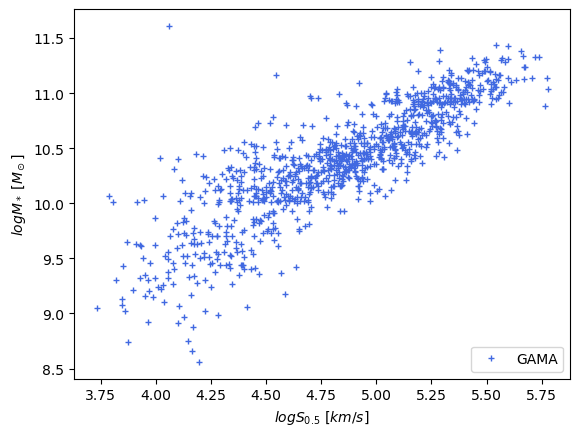

In [7]:
# Combine the gama table with the kinematics table, by cross matching the list of CATIDs
gama_kinematics = join(gama, kinematics, keys='catid')

# Calculate S0.5 for gama galaxies
gama_s05 = np.sqrt(0.5*(gama_kinematics['vsigma_re']*gama_kinematics['sigma_re'])**2 +
                   gama_kinematics['sigma_re']**2)
gama_s05_no_nan = gama_s05[~np.isnan(gama_s05)] # to remove nan

# log of stellar mass
log_gama_mass = gama_kinematics['mstar']
log_gama_mass_no_nan = log_gama_mass[~np.isnan(gama_s05)] # to delete corresponding rows

# Plot the log-log relation between stellar mass and S0.5
plt.plot(np.log(gama_s05_no_nan), log_gama_mass_no_nan, '+',
         markersize=5, color = 'royalblue', label='GAMA')
plt.xlabel('$logS_{0.5}$ $[km/s]$') # x-axis label
plt.ylabel('$logM_*$ $[M_\odot]$') # y-axis label
plt.legend(loc='lower right') # show legend

### **Excercise 1:**
Repeat example 1 with the cluster objects.

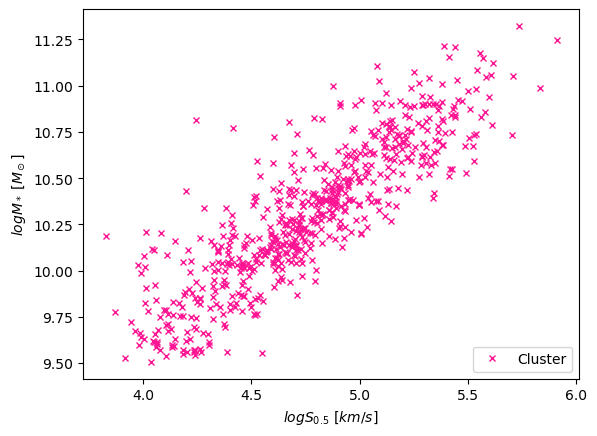

In [8]:
# Combine the clusters table with the kinematics table, by cross matching the list of CATIDs
clusters_kinematics = join(clusters, kinematics, keys='catid')

# Calculate S0.5 for clusters galaxies
clusters_s05 = np.sqrt(0.5*(clusters_kinematics['vsigma_re']*clusters_kinematics['sigma_re'])**2 
                       + clusters_kinematics['sigma_re']**2)
clusters_s05_no_nan = clusters_s05[~np.isnan(clusters_s05)] # to remove nan

# log of stellar mass
log_clusters_mass = clusters_kinematics['mstar']
log_clusters_mass_no_nan = log_clusters_mass[~np.isnan(clusters_s05)] # to delete corresponding rows

# Plot the log-log relation between stellar mass and S0.5
plt.plot(np.log(clusters_s05_no_nan), log_clusters_mass_no_nan, 'x',
         markersize=5, color = 'deeppink', label='Cluster')
plt.xlabel('$logS_{0.5}$ $[km/s]$') # x-axis label
plt.ylabel('$logM_*$ $[M_\odot]$') # y-axis label
plt.legend(loc='lower right') # show legend

## Linear Fitting
As we know, linear fitting is an important skill in physics, and is a key method to determine the relationship between two parameters.
### **Example 2:**
Using the GAMA objects, fit a linear function to relate $S_{0.5}$ and stellar mass.

In [9]:
# define a general linear function
def linear(parameters, x):
    m, c = parameters
    return m*x+c

In [10]:
# Fitting the linear curve to the data
model = Model(linear) # making the defined function into a model
# takes the real data and fits it to the model with an initial guess for the parameters
gama_odr = ODR(RealData(np.log(gama_s05_no_nan), log_gama_mass_no_nan),
                 model, beta0=[2,7])
gama_output = gama_odr.run()
gama_output.pprint()

Beta: [1.22995612 4.43877086]
Beta Std Error: [0.02141071 0.1039419 ]
Beta Covariance: [[ 0.01491864 -0.07217334]
 [-0.07217334  0.35159958]]
Residual Variance: 0.030727903434697324
Inverse Condition #: 0.014435842207843816
Reason(s) for Halting:
  Sum of squares convergence


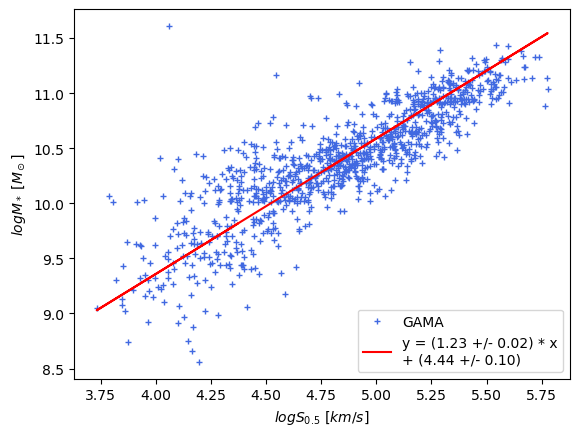

In [11]:
# plot the original figure with the line of best fit
plt.plot(np.log(gama_s05_no_nan), log_gama_mass_no_nan, '+',
         markersize=5, color = 'royalblue', label='GAMA') # orginal data
plt.plot(np.log(gama_s05_no_nan), linear(gama_output.beta, np.log(gama_s05_no_nan)),
         color='red', label = "y = ({:.2f} +/- {:.2f}) * x\n+ ({:.2f} +/- {:.2f})"
         .format(gama_output.beta[0], gama_output.sd_beta[0],gama_output.beta[1], gama_output.sd_beta[1]))

plt.xlabel('$logS_{0.5}$ $[km/s]$') # x-axis label
plt.ylabel('$logM_*$ $[M_\odot]$') # y-axis label
plt.legend(loc='lower right') # show legend

### **Excercise 2:**
Find the line of best fit for the galaxies in clusters. Then compare the trends from the gama galaxies and galaxies in clusters

In [12]:
# Fitting the linear curve to the data
model = Model(linear) # making the defined function into a model
# takes the real data and fits it to the model with an initial guess for the parameters
clusters_odr = ODR(RealData(np.log(clusters_s05_no_nan), log_clusters_mass_no_nan),
                 model, beta0=[1,6])
clusters_output = clusters_odr.run()
clusters_output.pprint()

Beta: [0.92850175 5.88393819]
Beta Std Error: [0.01996126 0.09550037]
Beta Covariance: [[ 0.01889298 -0.09007896]
 [-0.09007896  0.4324485 ]]
Residual Variance: 0.021089957640598195
Inverse Condition #: 0.014526204726265533
Reason(s) for Halting:
  Sum of squares convergence


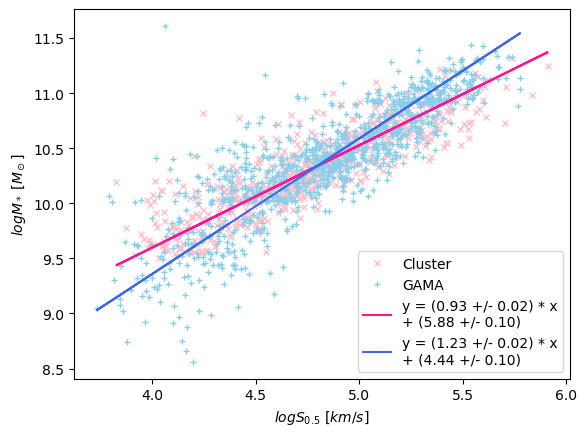

In [13]:
# plot the galaxies in clusters with the line of best fit
plt.plot(np.log(clusters_s05_no_nan), log_clusters_mass_no_nan, 'x',
         markersize=5, color = 'pink', label='Cluster')
plt.plot(np.log(gama_s05_no_nan), log_gama_mass_no_nan, '+',
         markersize=5, color = 'skyblue', label='GAMA')
plt.plot(np.log(clusters_s05_no_nan), linear(clusters_output.beta, np.log(clusters_s05_no_nan)),
         color='deeppink', label = "y = ({:.2f} +/- {:.2f}) * x\n+ ({:.2f} +/- {:.2f})"
         .format(clusters_output.beta[0], clusters_output.sd_beta[0],clusters_output.beta[1], clusters_output.sd_beta[1]))
plt.plot(np.log(gama_s05_no_nan), linear(gama_output.beta, np.log(gama_s05_no_nan)),
         color='royalblue', label = "y = ({:.2f} +/- {:.2f}) * x\n+ ({:.2f} +/- {:.2f})"
         .format(gama_output.beta[0], gama_output.sd_beta[0],gama_output.beta[1], gama_output.sd_beta[1]))

plt.xlabel('$logS_{0.5}$ $[km/s]$') # x-axis label
plt.ylabel('$logM_*$ $[M_\odot]$') # y-axis label
plt.legend(loc='lower right') # show legend

## BPT Diagram
### **Example and Exercise 3:**
Using the classifications given in Kewley et al. (2016), plot the emission line galaxy on a $\log⁡([OIII]/[OII])$ versus $\log⁡([OI]/H_\alpha)$ plot:
1. HII & Composites: $\log⁡([OIII]/[OII])<−1.701 \log⁡([OI]/H_\alpha)−2.163$
2. LINERS: $\log⁡([OIII]/[OII])<1.0 \log⁡([OI]/H_\alpha)+0.7$
3. Seyferts: $\log⁡([OIII]/[OII])>1.0 \log⁡([OI]/H_\alpha)+0.7$


In [14]:
# Finding the ratios for a chosen object
# SDSS ID: 1237648720693756163
# import data from shared csv file
emission_lines = ascii.read('sdss_spectra.csv', format='basic', delimiter=',')

# define lines
oi = emission_lines['[O I]']
oii = emission_lines['[O II]1'] + emission_lines['[O II]2']
oiii = emission_lines['[O III]']
halpha = emission_lines['[Ha]']

# find ratios
oi_ha = np.log(oi/halpha)
oiii_oii = np.log(oiii/oii)

In [16]:
emission_lines

[O I],[O II]1,[O II]2,[O III],[Ha]
float64,float64,float64,float64,float64
0.6696769,2.866154432,8.158620834,1.480936766,2.559224367
0.166452348,5.806766987,4.573880672,2.555238724,2.744266748
0.414115548,3.146868467,2.597596407,2.756209612,6.056303978
0.32403031,3.95488596,5.612743378,0.052134551,14.24738312
2.102042198,2.784169436,13.20730114,1.053153157,1.875946879
0.443892181,0.110181734,0.185281962,0.107256085,0.312503934


Text(0, -0.7, 'LINERs')

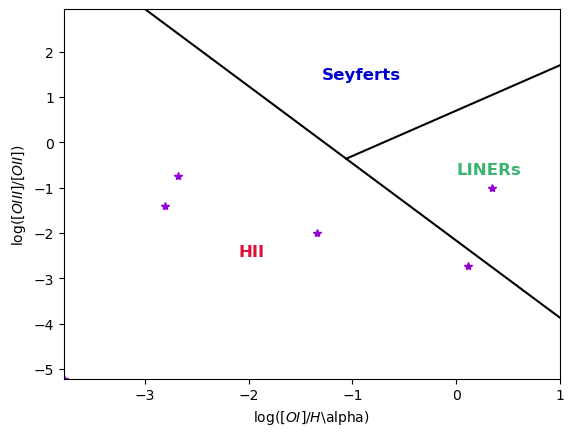

In [15]:
# Plot the diagnostic lines:
# let y = log([OIII]/[OII]) and x = log([OI]/H_alpha)

# find intersection of the diagnostic lines
intersect = (-2.163-0.7)/2.701

# defining the lines
x_hii= np.linspace(-3,1,1000)
y_hii = -1.701*x_hii-2.163
x_liner = np.linspace(intersect,1,1000)
y_liner = x_liner+0.7

# plotting diagnostic lines
plt.plot(x_hii, y_hii, 'black')
plt.plot(x_liner,y_liner, 'black')

# plot the emission galaxy
plt.plot(oi_ha, oiii_oii, '*', color='darkviolet')

# plot display settings
plt.xlabel('$\log([OI]/H$\\alpha$)$')
plt.ylabel('$\log([OIII]/[OII])$')
plt.margins(x=0)
plt.margins(y=0)

# Labels
plt.text(-2.1, -2.5, 'HII', fontsize=12, color = 'crimson', fontweight='bold')
plt.text(-1.3, 1.4, 'Seyferts', fontsize = 12, color = 'mediumblue', fontweight='bold')
plt.text(0, -0.7, 'LINERs', fontsize = 12, color = 'mediumseagreen', fontweight='bold')